# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

display(heroes_df.head())

powers_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [3]:
heroes_df = heroes_df.drop('Unnamed: 0', axis = 1)

In [4]:
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [5]:
heroes_df.shape, powers_df.shape

((734, 10), (667, 168))

In [6]:
heroes_df.dtypes

name           object
Gender         object
Eye color      object
Race           object
Hair color     object
Height        float64
Publisher      object
Skin color     object
Alignment      object
Weight        float64
dtype: object

In [7]:
display(heroes_df.info())
display(powers_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


None

In [8]:
display(heroes_df.isna().sum())
powers_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

hero_names               0
Agility                  0
Accelerated Healing      0
Lantern Power Ring       0
Dimensional Awareness    0
                        ..
Phoenix Force            0
Molecular Dissipation    0
Vision - Cryo            0
Omnipresent              0
Omniscient               0
Length: 168, dtype: int64

In [9]:
display(heroes_df.describe())
powers_df.describe()

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Kilowog,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


In [10]:
str_cols = heroes_df.select_dtypes('object').columns
str_cols

Index(['name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Publisher',
       'Skin color', 'Alignment'],
      dtype='object')

In [11]:
for col in str_cols:
        display(heroes_df[col].value_counts(normalize=True, dropna=False))

Spider-Man     0.004087
Goliath        0.004087
Nova           0.002725
Vindicator     0.002725
Firestorm      0.002725
                 ...   
Tiger Shark    0.001362
Hellcat        0.001362
Havok          0.001362
Blackwulf      0.001362
Husk           0.001362
Name: name, Length: 715, dtype: float64

Male      0.688011
Female    0.272480
-         0.039510
Name: Gender, dtype: float64

blue                       0.306540
-                          0.234332
brown                      0.171662
green                      0.099455
red                        0.062670
black                      0.031335
yellow                     0.025886
white                      0.023161
grey                       0.008174
hazel                      0.008174
purple                     0.005450
gold                       0.004087
yellow (without irises)    0.002725
violet                     0.002725
amber                      0.002725
blue / white               0.001362
silver                     0.001362
green / blue               0.001362
bown                       0.001362
yellow / red               0.001362
yellow / blue              0.001362
white / red                0.001362
indigo                     0.001362
Name: Eye color, dtype: float64

-                0.414169
Human            0.283379
Mutant           0.085831
God / Eternal    0.019074
Cyborg           0.014986
                   ...   
Czarnian         0.001362
Maiar            0.001362
Strontian        0.001362
Ungaran          0.001362
Human-Vulcan     0.001362
Name: Race, Length: 62, dtype: float64

-                   0.234332
Black               0.215259
Blond               0.134877
Brown               0.117166
No Hair             0.102180
Red                 0.069482
White               0.031335
Auburn              0.017711
Green               0.010899
Strawberry Blond    0.009537
Purple              0.006812
Grey                0.006812
Silver              0.005450
Brown / White       0.005450
black               0.004087
blond               0.004087
Blue                0.004087
Orange              0.002725
Yellow              0.002725
Gold                0.001362
Pink                0.001362
Red / Orange        0.001362
Red / White         0.001362
Red / Grey          0.001362
Brownn              0.001362
Magenta             0.001362
Indigo              0.001362
Orange / White      0.001362
Brown / Black       0.001362
Black / Blue        0.001362
Name: Hair color, dtype: float64

Marvel Comics        0.528610
DC Comics            0.292916
NBC - Heroes         0.025886
Dark Horse Comics    0.024523
NaN                  0.020436
Image Comics         0.019074
George Lucas         0.019074
HarperCollins        0.008174
Star Trek            0.008174
Team Epic TV         0.006812
SyFy                 0.006812
ABC Studios          0.005450
Shueisha             0.005450
Icon Comics          0.005450
IDW Publishing       0.005450
Wildstorm            0.004087
Sony Pictures        0.002725
J. K. Rowling        0.001362
Hanna-Barbera        0.001362
South Park           0.001362
Microsoft            0.001362
Titan Books          0.001362
J. R. R. Tolkien     0.001362
Universal Studios    0.001362
Rebellion            0.001362
Name: Publisher, dtype: float64

-                 0.901907
green             0.028610
blue              0.012262
red               0.012262
white             0.009537
grey              0.006812
silver            0.006812
gold              0.004087
purple            0.004087
yellow            0.002725
pink              0.002725
gray              0.001362
black             0.001362
orange            0.001362
orange / white    0.001362
red / black       0.001362
blue-white        0.001362
Name: Skin color, dtype: float64

good       0.675749
bad        0.282016
neutral    0.032698
-          0.009537
Name: Alignment, dtype: float64

In [12]:
to_replace = {'-':np.nan}
heroes_df['Alignment'].replace(to_replace)

0      good
1      good
2      good
3       bad
4       bad
       ... 
729    good
730    good
731    good
732    good
733     bad
Name: Alignment, Length: 734, dtype: object

In [13]:
for col in str_cols:
    heroes_df[col] = heroes_df[col].replace(to_replace)


In [26]:
heroes_df.isna().sum()

name            0
Gender         29
Eye color     172
Race          304
Hair color    172
Height          0
Publisher      15
Skin color    662
Alignment       7
Weight          0
dtype: int64

## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
Above I saw that powers does not have any missing data. Heroes is missing 15 publishers and 2 weight. I left publishers alone because there is not NaN and that isn't something you can really add on. For weight I replaced the two missing values with the median in order to not impact the std too much.



In [20]:
heroes_df['Weight']

0      441.0
1       65.0
2       90.0
3      441.0
4      -99.0
       ...  
729     52.0
730    -99.0
731     17.0
732     57.0
733     81.0
Name: Weight, Length: 734, dtype: float64

In [27]:
heroes_df['Skin color'].value_counts(dropna = False)

NaN               662
green              21
red                 9
blue                9
white               7
silver              5
grey                5
gold                3
purple              3
pink                2
yellow              2
black               1
orange / white      1
red / black         1
orange              1
blue-white          1
gray                1
Name: Skin color, dtype: int64

In [50]:
heroes_df['Skin color'] = heroes_df['Skin color'].fillna(value = "missing")

In [28]:
heroes_df.isna().sum()/len(heroes_df)

name          0.000000
Gender        0.039510
Eye color     0.234332
Race          0.414169
Hair color    0.234332
Height        0.000000
Publisher     0.020436
Skin color    0.901907
Alignment     0.009537
Weight        0.000000
dtype: float64

In [35]:
heroes_df['Eye color'].value_counts(normalize=True, dropna = False)

blue                       0.306540
NaN                        0.234332
brown                      0.171662
green                      0.099455
red                        0.062670
black                      0.031335
yellow                     0.025886
white                      0.023161
grey                       0.008174
hazel                      0.008174
purple                     0.005450
gold                       0.004087
violet                     0.002725
amber                      0.002725
yellow (without irises)    0.002725
silver                     0.001362
blue / white               0.001362
green / blue               0.001362
bown                       0.001362
yellow / red               0.001362
yellow / blue              0.001362
white / red                0.001362
indigo                     0.001362
Name: Eye color, dtype: float64

In [34]:
rel_prob = [.31, .17, .10, .06]
prob = [i/sum(rel_prob) for i in rel_prob]
def impute_eye_color(value):
    if value== 'NaN':
        return np.random.choice(['blue', 'brown', 'green', 'red'], p=prob)
    else:
        return value
heroes_df['Eye color'] = heroes_df['Eye color'].map(lambda x: impute_eye_color(x))

In [31]:
heroes_df.isna().sum()

name            0
Gender         29
Eye color     172
Race          304
Hair color    172
Height          0
Publisher      15
Skin color    662
Alignment       7
Weight          0
dtype: int64

In [55]:
heroes_df[col].value_counts().index

Index(['good', 'bad', 'neutral'], dtype='object')

In [56]:
for col in str_cols:
    val_counts = heroes_df[col].value_counts()
    top_class = val_counts.index[0]
    heroes_df

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [36]:
heroes_df.drop_duplicates(subset='name', inplace=True)

In [37]:
heroes_df.reset_index(drop=True, inplace=True)

In [38]:
powers_df.rename(columns={'hero_names':'name'}, inplace=True)

In [39]:
powers_df = powers_df.astype('str')

In [40]:
heroes_and_powers_df = powers_df.set_index('name').join(heroes_df.set_index('name'), how='inner')

In [41]:
heroes_and_powers_df.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Omniscient,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,Male,yellow,Human,No Hair,203.0,Marvel Comics,NaN,good,441.0
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,NaN,bad,441.0
Abraxas,False,False,False,True,False,False,False,False,True,False,...,False,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,NaN,bad,-99.0


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [42]:
heroes_df.dtypes

name           object
Gender         object
Eye color      object
Race           object
Hair color     object
Height        float64
Publisher      object
Skin color     object
Alignment      object
Weight        float64
dtype: object

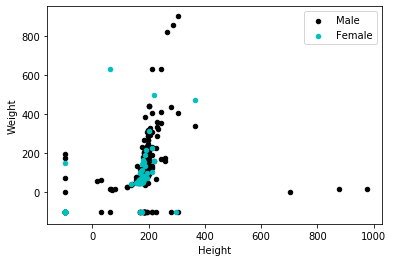

In [43]:
male_heroes_df = heroes_df[heroes_df['Gender'] == 'Male']
female_heroes_df = heroes_df[heroes_df['Gender'] == 'Female']

ax = male_heroes_df.plot.scatter(x='Height', y='Weight', c='k', label='Male')
female_heroes_df.plot.scatter(x='Height', y='Weight', c='c', label='Female', ax=ax)

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [44]:
import seaborn as sns

In [45]:
male_heroes_df = heroes_df[heroes_df['Gender'] == 'Male']
female_heroes_df = heroes_df[heroes_df['Gender'] == 'Female']

def show_distplot(dataframe, gender, column_name):
    plt.plot()
    dataframe[column_name].hist()
    plt.xlabel(column_name)
    plt.ylabel('Density')
    plt.title(f' Distribution of {column_name} for {gender} heroes')
    plt.show()
    
    
    

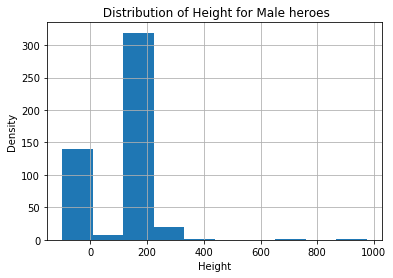

mean      109.112016
median    180.000000
std       144.077887
Name: Height, dtype: float64


In [46]:
# Male Height
show_distplot(male_heroes_df, 'Male', 'Height')
print(male_heroes_df['Height'].apply(['mean', 'median', 'std']))

(array([134.,   7., 315.,  20.,   1.,   0.,   0.,   1.,   0.,   2.]),
 array([-99. ,   8.4, 115.8, 223.2, 330.6, 438. , 545.4, 652.8, 760.2,
        867.6, 975. ]),
 <a list of 10 Patch objects>)

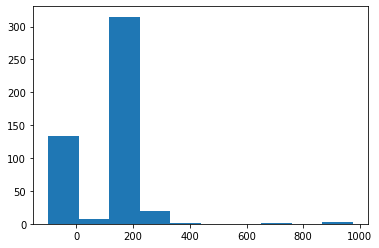

In [70]:
plt.hist(male_heroes_df['Height'])

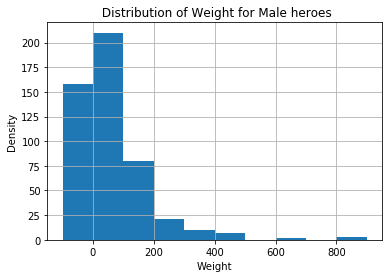

mean       53.556008
median     79.000000
std       139.737226
Name: Weight, dtype: float64


In [47]:
# Male Weight
show_distplot(male_heroes_df, 'Male', 'Weight')
print(male_heroes_df['Weight'].apply(['mean', 'median', 'std']))

(array([158., 210.,  80.,  21.,  10.,   7.,   0.,   2.,   0.,   3.]),
 array([-99. ,   0.9, 100.8, 200.7, 300.6, 400.5, 500.4, 600.3, 700.2,
        800.1, 900. ]),
 <a list of 10 Patch objects>)

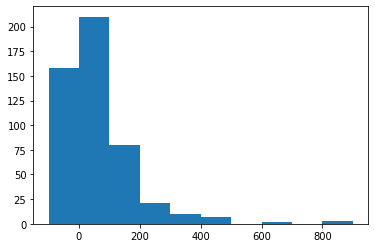

In [48]:
plt.hist(male_heroes_df['Weight'])

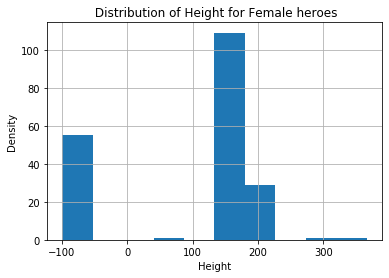

mean       97.992347
median    168.000000
std       125.002405
Name: Height, dtype: float64


In [49]:
# Female Height
show_distplot(female_heroes_df, 'Female', 'Height')
print(female_heroes_df['Height'].apply(['mean', 'median', 'std']))

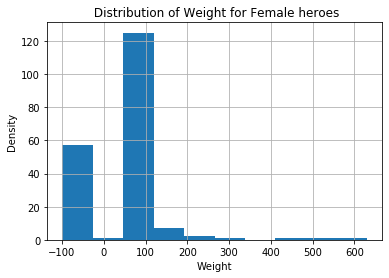

mean       27.433673
median     54.000000
std       104.243112
Name: Weight, dtype: float64


In [50]:
# Female Weight
show_distplot(female_heroes_df, 'Female', 'Weight')
print(female_heroes_df['Weight'].apply(['mean', 'median', 'std']))

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line: Most of the data is positively skewed. We can see the median height for women is 168 with a median weight of 54. For males the median of height is 183 with a median weight of 53. The males graphs line up more portportionately in comparison to the females graphs.
____________________________________________________________________________________________________________________________



### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [58]:
def top_5_powers(dataframe):
    df = dataframe.drop(heroes_df.columns.values[1:], axis=1)
    columns = df.columns.values
    for col in columns:
        df[col] = df[col].map({'True' : 1, 'False': 0})
        
    powers_count_dict = dict(df.sum())
    
    return sorted(powers_count_dict.items(), key=lambda x: x[1], reverse=True)[:5]

overall_top_5 = top_5_powers(heroes_and_powers_df)
print(overall_top_5)

[('Super Strength', 350), ('Stamina', 281), ('Durability', 251), ('Super Speed', 241), ('Agility', 235)]


In [64]:
marvel_df = heroes_and_powers_df[heroes_and_powers_df['Publisher'] == 'Marvel']
marvel_answer = top_5_powers(marvel_df)
print(marvel_answer)

[('Agility', 0), ('Accelerated Healing', 0), ('Lantern Power Ring', 0), ('Dimensional Awareness', 0), ('Cold Resistance', 0)]


In [66]:
dc_df = heroes_and_powers_df[heroes_and_powers_df['Publisher'] == 'DC Comics']
dc_answer = top_5_powers(dc_df)
print(dc_answer)

[('Super Strength', 103), ('Flight', 83), ('Stamina', 83), ('Super Speed', 75), ('Agility', 68)]


Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
The only top 5 power that DC and Marvel share are Agility, the rest are different from one another. When comparing with the overall top 5 we can see that dc has more in common than Marvel with super strength, super speed, and agility in the top 5. This would lead me to believe that there are more dc superheroes than marvel with those powers.

### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [80]:
Aliens = heroes_df[heroes_df['Race'] == 'Alien']
print(Aliens)

              name  Gender Eye color   Race Hair color  Height      Publisher  \
40          Ardina  Female     white  Alien     Orange   193.0  Marvel Comics   
104      Blackwulf    Male       red  Alien      White   188.0  Marvel Comics   
157        Century    Male     white  Alien      White   201.0  Marvel Comics   
220       Doomsday    Male       red  Alien      White   244.0      DC Comics   
238       Evilhawk    Male       red  Alien      Black   191.0  Marvel Comics   
329         Indigo  Female       NaN  Alien     Purple   -99.0      DC Comics   
586  Silver Surfer    Male     white  Alien    No Hair   193.0  Marvel Comics   

    Skin color Alignment  Weight  
40        gold      good    98.0  
104        NaN       NaN    88.0  
157       grey      good    97.0  
220        NaN       bad   412.0  
238      green       bad   106.0  
329        NaN   neutral   -99.0  
586     silver      good   101.0  


In [95]:
Aliens = heroes_df[heroes_df['Race'] == 'Alien'].fillna('MISSING')

In [107]:
display(Aliens)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
40,Ardina,Female,white,Alien,Orange,193.0,Marvel Comics,gold,good,98.0
104,Blackwulf,Male,red,Alien,White,188.0,Marvel Comics,MISSING,MISSING,88.0
157,Century,Male,white,Alien,White,201.0,Marvel Comics,grey,good,97.0
220,Doomsday,Male,red,Alien,White,244.0,DC Comics,MISSING,bad,412.0
238,Evilhawk,Male,red,Alien,Black,191.0,Marvel Comics,green,bad,106.0
329,Indigo,Female,MISSING,Alien,Purple,-99.0,DC Comics,MISSING,neutral,-99.0
586,Silver Surfer,Male,white,Alien,No Hair,193.0,Marvel Comics,silver,good,101.0


In [134]:
Aliens['Skin color'].value_counts()

MISSING    3
grey       1
silver     1
gold       1
green      1
Name: Skin color, dtype: int64

Text(0, 0.5, 'Quantity of each')

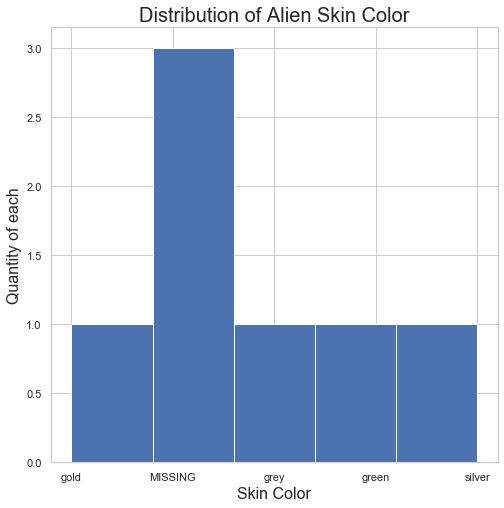

In [133]:
fig, ax = plt.subplots(figsize = (8,8))
ax.hist(Aliens['Skin color'], bins = 5)
ax.set_title('Distribution of Alien Skin Color', fontsize = '20')
ax.set_xlabel('Skin Color', fontsize = '16')
ax.set_ylabel('Quantity of each', fontsize = '16')

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data